# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

An online news portal, E-news Express, wants to increase its number of subscribers in order to grow its business. Executives for E-news Express are concerned that the website's orignial landing page is not engaging enough to attract readers and convince them to subscribe to the news portal. A new landing page with a different layout and more relevant content is designed. 

We, the data science department of E-news Express, have been tasked with determining whether the new website is attracting more readers and converting them to subscribers than the original website. The news portal has collected two random samples for us to analyze. One sample contains data on fifty readers of the original website. The second sample has data on fifty readers who viewed the new redesigned website. We will determine the efficacy of the new site by answering four questions:
   1. Do readers spend more time on the redesigned website than the original?
   2. Does the new website convert a greater proportion of its viewers than the original?
   3. Is there a correlation between the number of converted readers and their language preference?
   4. Do groups with different language preferences view the new website for equal amounts of time?

## Import all the necessary libraries

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Reading the Data into a DataFrame

In [2]:
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
# view first five and last five entries of dataframe
df

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


In [5]:
# view dataframe shape
df.shape

(100, 6)

**Observation:**
* 100 entries
* 6 fields

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**Observation:**
* Four fields are categorical
* Two fields contain numerical values.

In [7]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

**Observation:**
* No null values for any of the fields

In [8]:
df["time_spent_on_the_page"].describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

### Univariate Analysis

**The dataframe contains two sample groups. I have separated the dataframe into an"old" dataframe containing the viewership of the old landing page and a "new" dataframe containing the viewership of the new landing page. Each dataframe is analysized separately.**

In [11]:
# dataframe containing entries in which the users viewed the old landing page
old = df[df["landing_page"]=="old"]

# dataframe containing entries in which the users viewed the new landing page
new = df[df["landing_page"]=="new"]

Time Spent Viewing the Old Page:
Mean: 4.53 
Median: 4.38 
Standard Deviation: 2.58


Time Spent Viewing the New Page:
Mean: 6.22 
Median: 6.11 
Standard Deviation: 1.82


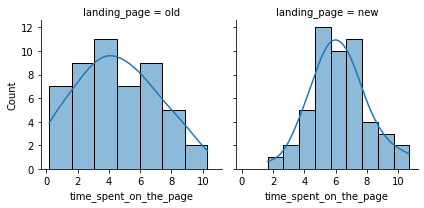

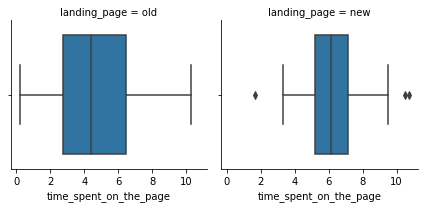

In [12]:
# old 
print("Time Spent Viewing the Old Page:\nMean:",round(old["time_spent_on_the_page"].mean(),2),"\nMedian:",round(old["time_spent_on_the_page"].median(),2),"\nStandard Deviation:",round(old["time_spent_on_the_page"].std(),2))

# new
print("\n\nTime Spent Viewing the New Page:\nMean:",round(new["time_spent_on_the_page"].mean(),2),"\nMedian:",round(new["time_spent_on_the_page"].median(),2),"\nStandard Deviation:",round(new["time_spent_on_the_page"].std(),2))


g = sns.FacetGrid(df, col="landing_page")
g.map(sns.histplot, "time_spent_on_the_page",kde=True);
plt.show()

g = sns.FacetGrid(df, col="landing_page")
g.map(sns.boxplot, "time_spent_on_the_page");
plt.show()

**Observations:**

**Old:**
  * The distribution of the time spent on the old page has a slight right skew.
  * The boxplot reveals are no outliers.
  * The mean of the time spent on the page is 4.53, and the standard deviation is 2.58
  
**New:**
  * The distribution of time spent on the new page has a slight right skew.
  * There are three outliers.
  * The mean of the time spent on the page is 6.22, and the standard deviation is 1.82
<br></br>
  
* The mean and median of the time spent viewing the new page is greater than the mean and median of the old page.
* There appears to be less variance in the time spent on the new page than on the old landing page. 

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64


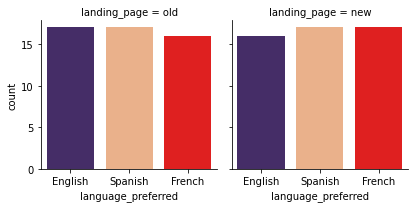

In [13]:
#Old
print(old["language_preferred"].value_counts())
print()
#New
print(new["language_preferred"].value_counts())

#Count Plot 
g = sns.FacetGrid(df, col="landing_page")
g.map(sns.countplot, "language_preferred", palette=['#432371',"#FAAE7B","red"]);
plt.show()

**Observations:**
* Roughly equal numbers of Spanish, French and English preferences in both the old and new samples.


In [14]:
contingency_table = pd.crosstab(df['converted'],df['landing_page'])
contingency_table

landing_page,new,old
converted,,
no,17,29
yes,33,21


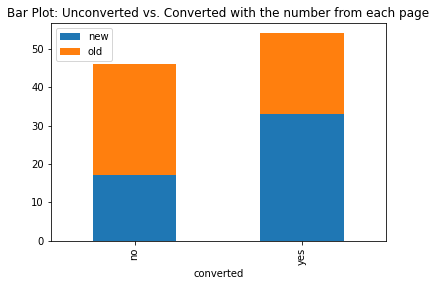

In [15]:
contingency_table.plot(kind='bar',stacked =True)
plt.legend()
plt.title("Bar Plot: Unconverted vs. Converted with the number from each page")
plt.show()

**Observations:**
* 46 visitors did not convert while 54 visitors converted
* Of the 54 converted visitors, 21 came from the old landing page while 33 came from the new landing page
<br></br>
<hr style="border:1px solid black">

### Bivariate Analysis

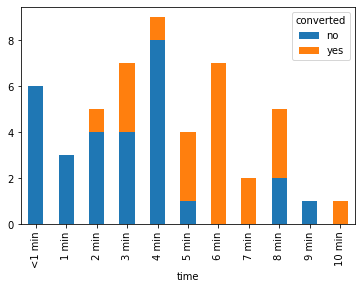

In [16]:
# break the time spent on the old page into 11 time bins.

bins = [0, 1,2,3,4,5,6,7,8,9,10,11]
labels = ['<1 min',"1 min","2 min","3 min","4 min","5 min","6 min","7 min","8 min","9 min","10 min"]
old['time'] = pd.cut(x = old["time_spent_on_the_page"], bins = bins, labels = labels, include_lowest = True)


old.sort_values('time')
old_time_table = pd.crosstab(old["time"],old['converted']);
old_time_table.plot(kind='bar',stacked =True);
plt.show()

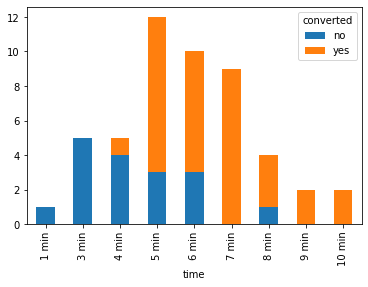

In [17]:
bins = [0, 1,2,3,4,5,6,7,8,9,10,11]
labels = ['<1 min',"1 min","2 min","3 min","4 min","5 min","6 min","7 min","8 min","9 min","10 min"]
new['time'] = pd.cut(x = new["time_spent_on_the_page"], bins = bins, labels = labels, include_lowest = True)

new.sort_values('time')
time_table = pd.crosstab(new["time"],new['converted']);
time_table.plot(kind='bar',stacked =True);

**Observations:**
* People are unlikely to convert if they spend less than 2 minutes on either landing page.
* The most conversion after viewing the old landing page occured around 6 minutes.
* The most conversions appear to occur after users viewed the new page for 5 to 7  minutes.

In [18]:
contingency_table_language = pd.crosstab(df['converted'],df['language_preferred'])
contingency_table_language

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


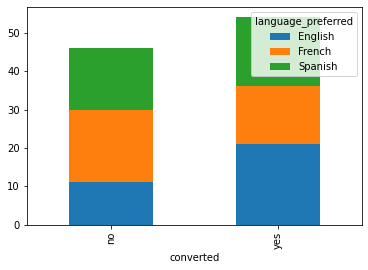

In [19]:
contingency_table_language.plot(kind='bar',stacked =True);

**Observation:**
* Roughly two thirds of English speakers converted after viewing the new landing page.
* Less than half the French speakers converted after viewing the new landing page.
* A little more than half the Spanish speakers converted after viewing the new landing page.
* A Two Proportion Z-test can reveal if the conversion rates of the three groups are significantly different and which group has the highest conversion rate if differences exist.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis



Mean viewing time for old landing page: 4.53
Standard deviation of the viewing time for the old landing page: 2.58


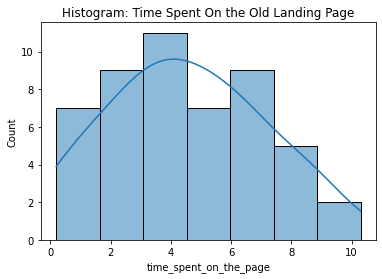



Mean viewing time for old landing page: 6.22
Standard deviation of the viewing time for the old landing page: 1.82


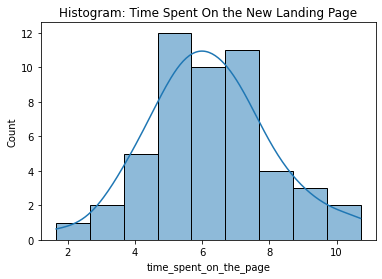

In [20]:
# Select rows containing data for visitors to the old landing page.
# Find average viewing time.
# Plot histogram
old = df[df["landing_page"]=="old"]
print("\n\nMean viewing time for old landing page:", round(old["time_spent_on_the_page"].mean(),2))
print("Standard deviation of the viewing time for the old landing page:", round(old["time_spent_on_the_page"].std(),2) )
sns.histplot(data=old, x="time_spent_on_the_page",kde=True);
plt.title("Histogram: Time Spent On the Old Landing Page");
plt.show()

# Select rows containing data for visitors to the new landing page.
# Find average viewing time
# Plot histogram
new = df[df["landing_page"]=="new"]
print("\n\nMean viewing time for old landing page:", round(new["time_spent_on_the_page"].mean(),2))
print("Standard deviation of the viewing time for the old landing page:", round(new["time_spent_on_the_page"].std(),2) )
sns.histplot(data=new, x="time_spent_on_the_page",kde = True);
plt.title("Histogram: Time Spent On the New Landing Page");

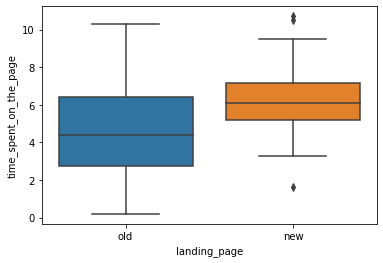

In [21]:
# Box plot 
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page') ;

**Observations:**
* The new landing page's mean viewing time is 6.22 minutes. The older landing page has a mean viewing time of 4.53 minutes 
* There is more variance in the old landing page's viewing time. 
    * Old landing page's standard deviation: 2.58
    * New landing page's standard deviation: 1.82
* The new landing page has several outliers while the old landing page has none.
* The distributions of viewing time for both the old and new landing pages are both slightly skewed. 

### Step 1: Define the null and alternate hypotheses

$\mu_o$ will represent the mean viewing time for the old landing page.

$\mu_n$ will represent the mean viewing time for the new landing page.


The null hypothesis:

>$H_0:\mu_o$ >= $\mu_n$

The alternate hypothesis

>$H_a:\mu_o<\mu_n$

### Step 2: Select Appropriate test

Two Independent Sample T-test for Equality of Means

Assumptions for the test are met:
- Viewing time is continuous data.
- The samples are normally distributed.  The Central Limit Theorem applies since the sample size of both samples is 50(>30).  
- The samples are taken from two independent groups.
- The standard deviations of the two samples are unequal.
- The samples were randomly selected.


### Step 3: Decide the significance level

We will set $\alpha$ to 0.05

### Step 4: Collect and prepare data

In [ ]:
#See above analysis

### Step 5: Calculate the p-value

In [22]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(old['time_spent_on_the_page'], new['time_spent_on_the_page'], equal_var = False, alternative = 'less')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

The p-value ( 0.0001392381225166549) is less than the $\alpha$ value of 0.05.

There is enough evidence to reject the null hypothesis. The alternative hypothesis can be accepted.

### Step 7:  Draw inference

The mean of the time spent viewing the newer landing page is greater than the mean of the time spent viewing the original page. 
<br></br>
<hr style="border:1px solid black">


## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

In [23]:
contingency_table

landing_page,new,old
converted,,
no,17,29
yes,33,21


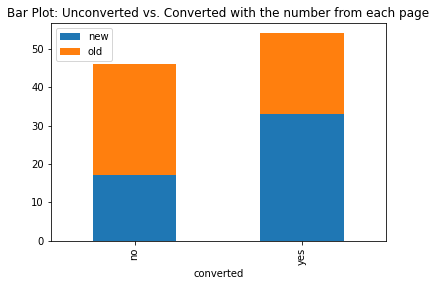

In [126]:
contingency_table.plot(kind='bar',stacked =True)
plt.legend()
plt.title("Bar Plot: Unconverted vs. Converted with the number from each page")
plt.show()

### Step 1: Define the null and alternate hypotheses
$P_O$ will represent the conversion rate for the old landing page.

$P_N$ will represent the conversion rate for the new landing page.


The null hypothesis:

>$H_0: P_O$ >= $P_N$

The alternate hypothesis

>$H_a:P_O<P_N$


### Step 2: Select Appropriate test

Two Proportion Z-test

- Binomally distributed population - A viewer either converts or does not.
- The two populations are randomly sampled.
- np and n(1-p) are greater than to 10.

>$np_O = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_O) = 50 \cdot \frac{50-21}{50} =29 \geq 10 \\
np_N = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_N) = 50 \cdot \frac{50-33}{50} =17 \geq 10 $

### Step 3: Decide the significance level

We will set $\alpha$ to 0.05

### Step 4: Collect and prepare data

In [20]:
contingency_table = pd.crosstab(df['converted'],df['landing_page'])
contingency_table

landing_page,new,old
converted,,
no,17,29
yes,33,21


### Step 5: Calculate the p-value

In [25]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of conversions
conversion_count = np.array([21, 33])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(conversion_count, nobs,alternative="smaller")
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

The p-value (0.016052616408112556) is less than the $\alpha$ of .05.

There is enough evidence to reject the null hypothesis.

### Step 7:  Draw inference

The conversion rate of the new landing page is greater with the old landing page.
<br></br>
<hr style="border:1px solid black">


## 3. Is the conversion and preferred language are independent or related?


### Step 1: Define the null and alternative hypotheses


The null hypothesis:

>$H_0:$ The conversion and language preferences are independent.

The alternate hypothesis

>$H_a:$ The conversion and language preferences are dependent.

### Step 2: Select the test
Chi-Square Test for Independence

* Categorical variables
* The number of observations in each level is greater than 5.
* Random sampling from the population

### Step 3: Set the significance level
We will set $\alpha$ to 0.05

### Step 4: Collect and Prepare The Data

In [22]:
table = pd.crosstab(df["converted"],df["language_preferred"])
table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate P-Value

In [23]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the P-Value with $\alpha$

The p-value ( 0.21298887487543447) is greater than the $\alpha$ value of 0.05. There is not enough evidence to reject the null hypothesis.

### Step 7: Draw Inference
The null hypothesis is not overturned. The converted and the language preferences are independent.
<br></br>
<hr style="border:1px solid black">



## 4. Is the time spent on the new page same for the different language users?

### Step 1: Define the null and alternative hypotheses


The null hypothesis:

>$H_0:$ Different groups of language users spend equal amounts of time on the new page.

The alternate hypothesis

>$H_a:$ At least one of the groups of language users spends an unequal amount of time on the new page.

### Step 2: Select the test
One-way ANOVA Test

* The populations are normally distributed - A Shapiro-Wilk’s test will be used to confirm this assumption.
* The samples are randomly collected.
* Population variances are equal - A Levene's test will determine if this is true. 

### Step 3: Set the significance level
We will set $\alpha$ to 0.05

### Step 4: Collect and Prepare The Data

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64



language_preferred
English    1.984150
French     1.933394
Spanish    1.525656
Name: time_spent_on_the_page, dtype: float64





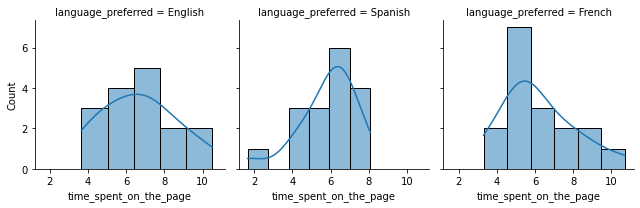

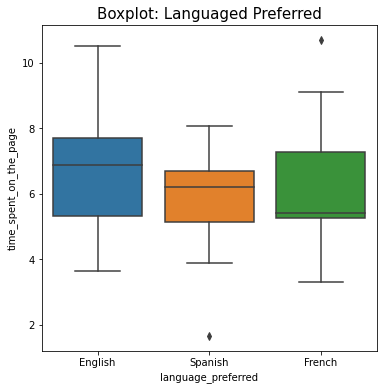

Text(0.5, 1.0, 'Histogram: Time Spent On the New Page')

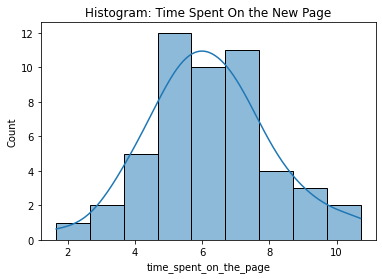

In [130]:
# mean of time spent on the new landing page for each group of speakers
print(new.groupby("language_preferred")["time_spent_on_the_page"].mean())
print("\n\n")

print(new.groupby("language_preferred")["time_spent_on_the_page"].std())
print("\n\n")

# draw histogram for each language group
g = sns.FacetGrid(new, col="language_preferred")
g.map(sns.histplot, "time_spent_on_the_page", kde=True);
plt.show()

print("\n\n")
# draw the boxplot for English, French and Spanish speakers 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(data= new, x= "language_preferred", y = 'time_spent_on_the_page');
a.set_title("Boxplot: Languaged Preferred", fontsize=15);
plt.show()

sns.histplot(data=new, x = "time_spent_on_the_page", kde = True);
plt.title("Histogram: Time Spent On the New Page")

**Observations:**
* The median and mean viewing time for each group are not tightly grouped.
* The histograms and boxplots for each language group suggests that their distributions are not normal distributed.
* The standard deviations for the three language groups appear fairly equal.
* The distribution of time spent on the new landing page appears close to normally distributed.

### Shapiro-Wilk’s test

>$H_0:$ Time spent on the new page follows a normal distribution 

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [82]:
# Shapiro-Wilk's test to confirm that the distribution of the three language groups are evenly distributed.
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(new["time_spent_on_the_page"]) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


**Observations:**

The p-value is greater than the $\alpha$ of 0.05. There is not enough evidence to invalidate the null hypothesis. The distribution of the time spent on the new landing page is normally distributed.

### Levene’s test


>$H_0$: The variances in the time spent on the new page by each language group are equal.

against the alternative hypothesis

>$H_a$: At least one language group has a variance that is different from the rest.

In [131]:
#Levene’s test to confirm that the variances are equal between the three language groups
from scipy.stats import levene
statistic, p_value = levene( new[new["language_preferred"]=="English"]["time_spent_on_the_page"], 
                                   new[new["language_preferred"]=="Spanish"]["time_spent_on_the_page"], 
                                   new[new["language_preferred"]=="French"]["time_spent_on_the_page"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


**Observation:**

The p-value is greater than 0.05. The variances of the three language groups are equal.

### Step 5: Calculate P-Value

In [83]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(new[new["language_preferred"]=="English"]["time_spent_on_the_page"], 
                                   new[new["language_preferred"]=="Spanish"]["time_spent_on_the_page"], 
                                   new[new["language_preferred"]=="French"]["time_spent_on_the_page"])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the P-Value with $\alpha$

The p-value ( 0.43204138694325955) is greater than the $\alpha$ value of 0.05. There is not enough evidence to reject the null hypothesis.

### Step 7: Draw Inference
The null hypothesis is not overturned. The users from the three language groups viewed the new landing page for equal amounts of time.
<br></br>
<hr style="border:1px solid black">



## Question: Do the language preferences have unequal conversion rates?


### Step 1: Define null and alternative hypothesis
Let $p_E, p_S, and p_F$ be the proportions of converted in the English, Spanish and French language groups respectively.

The null hypothesis

>$H_0:p_E = p_S = p_F$

against the alternate hypothesis

>$H_a:p_E \neq p_S  or  p_E\neq p_F or p_S\neq p_F $


### Step 2: Select Test
Two Proportion Z-test

The Two-Proportion Z-test will be run twice to test the null and the alternative hypotheses. 
1. The first test will test if the conversion rate of the English preferred group is equal than that of the Spanish preferred group.
2. The second test will test if the conversion rate of the English preferred group is equal than that of the French preferred group.
If the English conversion rate is equal to the Spanish conversion rate and the Spanish conversion rate is equal to the French conversion rate, we can assume that the English and French conversion rates are equal. 

Test Assumptions:
* Binomally distributed population - A user can either convert or not convert.
* Random sampling from the population 
* The np and n(1-p) values are greater than or equal to 10. The Central Limit Theorem supports that the binomial distriubtion approximates the normal distribution.

>$np_E = 32\cdot \frac{21}{32} =21 \geq 10\\
n(1-p_E) = 32 \cdot \frac{32-21}{32} =11 \geq 10 \\
np_S = 34\cdot \frac{18}{34} =18 \geq 10\\
n(1-p_S) = 34\cdot \frac{34-18}{34} =16 \geq 10 \\
np_F = 34\cdot \frac{15}{34} =15 \geq 10\\
n(1-p_F) = 34\cdot \frac{34-15}{34} =19 \geq 10 $

### Step 3: Set Significance Level
We will set $\alpha$ to 0.05


### Step 4: Collect and Prepare Data

In [132]:
table = pd.crosstab(df["converted"],df["language_preferred"])
table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate P-Value:

In [133]:
# First test - Conversion rate of the English preferred vs the conversion rate of the Spanish preferred
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of conversion
conversion_count = np.array([21, 18])

# set the sample sizes
nobs = np.array([32, 34])

# find the p-value
test_stat, p_value = proportions_ztest(conversion_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.2949041784943084


The p-value is greater than 0.05. There is not enough evidence to overturn the null hypothesis. The English and Spanish conversion rates are equal.

In [134]:
# Second test - Conversion rate of the English preferred vs the conversion rate of the French preferred

# set the counts of conversion
conversion_count = np.array([21, 15])

# set the sample sizes
nobs = np.array([32, 34])

# find the p-value
test_stat, p_value = proportions_ztest(conversion_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.07947763501073615


The p-value is greater than 0.05. There is not enough evidence to overturn the null hypothesis. The French and Spanish conversion rates are equal.

### Step6: Compare the P-Value with $\alpha$
The p-values for both Two Proportion Z-test were greater than the $\alpha$ of 0.05. There is no evidence to over turn the null hypothesis. 

### Step 7: Draw Inference
The conversion rates for each of the language preferences is the same.

## Conclusion and Business Recommendations

#### Conclusions

1. Readers spent more time viewing the new redesigned website than the original website. 
2. The new website converter a higher proportion of its views to subscribers than the original website.
3. The language preference of a reader does not predict whether he/she will subscribe.
4. The readers from the three language groups viewed the new website for equal amounts of time and their conversion rates were equal.

#### Recommendations
* E-news Express should commit to using the new website. It does a better job of engaging readers and converting them to subscribers.
* The news portal should collect data on what aspects of the new design and content the readers like in order to improve the new website and expand their business. 
    * number of views on particular topics and articles
    * time spent viewing photos, infographs etc.
    * conduct a survey or focus group
* The portal should not invest too much into catering to a particular different language group. English, Spanish and French readers view the portal in equal numbers, for equal amounts of time and their conversion rates are equal.

___